In [22]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = DATA["X_gpa"]
    X_snps = DATA["X_snps"]
    X_genexp = DATA["X_genexp"]

In [3]:
Y = pd.DataFrame(pheno.iloc[:, 1:])
Y = Y.set_index(pheno["strain_ids"])
Y = Y.fillna(-1)

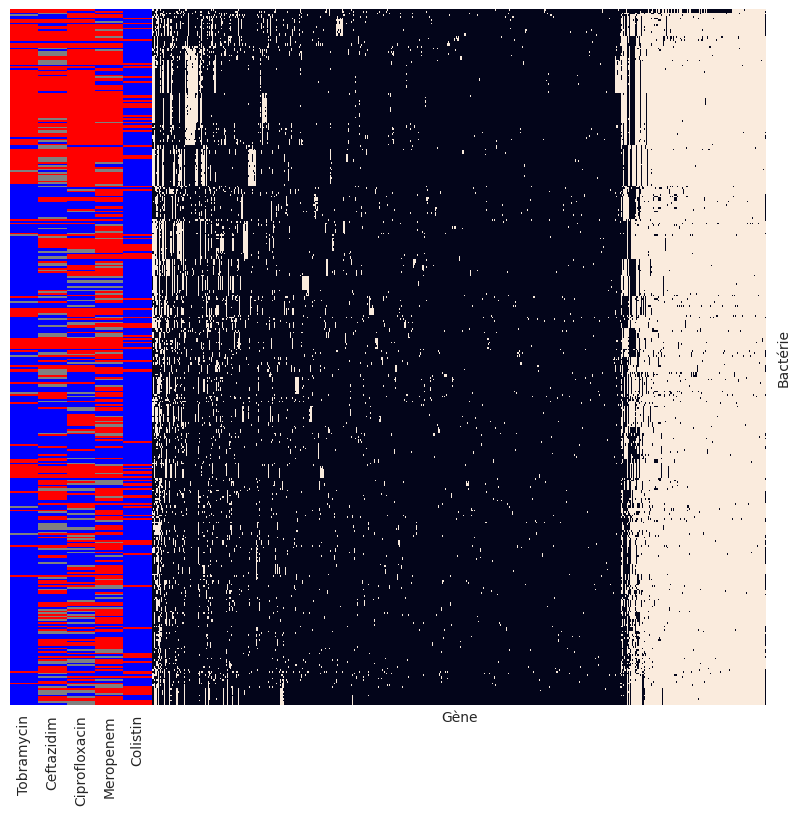

In [23]:
X = pd.DataFrame(X_gpa, index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), ("red", "blue", "grey")))
row_colors = Y.applymap(lambda x: lut[x])
cm = sns.clustermap(X, row_colors=row_colors, cbar_pos=None,
                    xticklabels=False, yticklabels=False)
cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.ax_heatmap.set_xlabel("Gène")
cm.ax_heatmap.set_ylabel("Bactérie")
plt.savefig("rapport/images/gpa_cm.png", dpi=300, bbox_inches="tight")

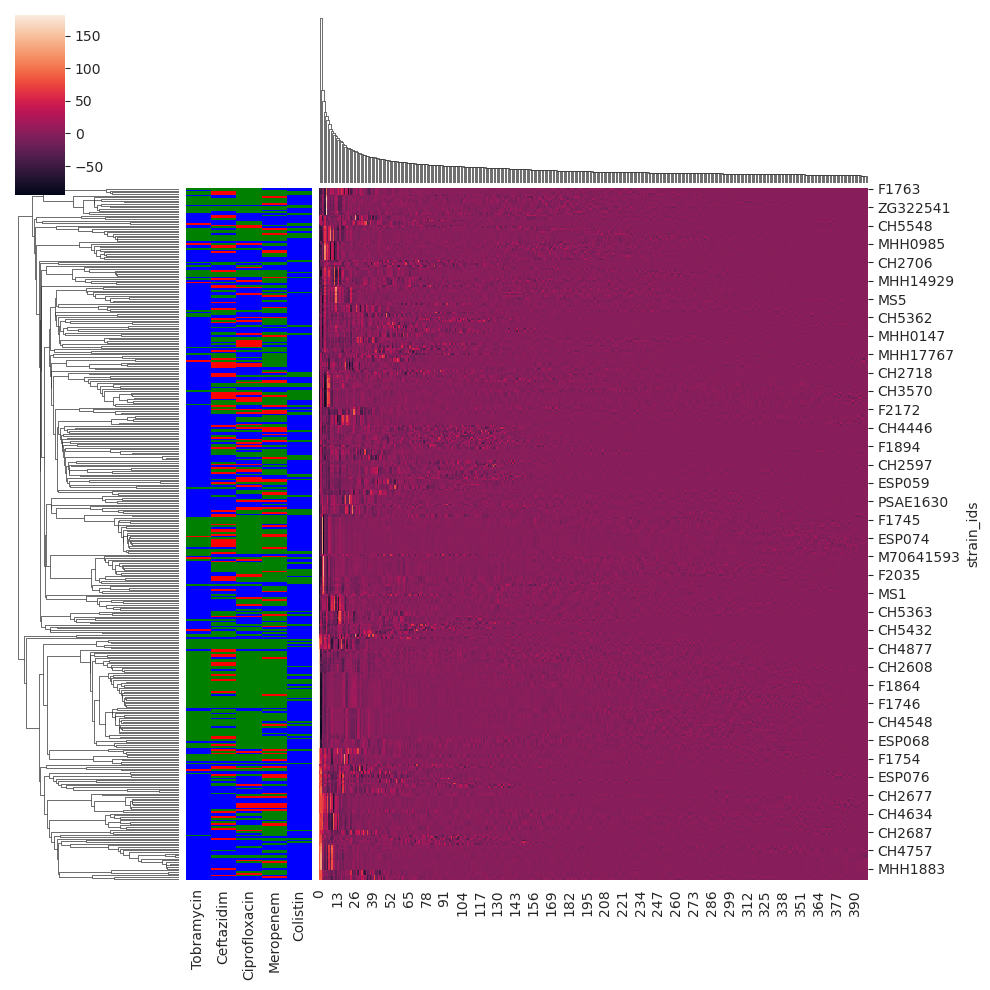

In [5]:
X = pd.DataFrame(PCA(n_components=400).fit_transform(X_snps), index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)

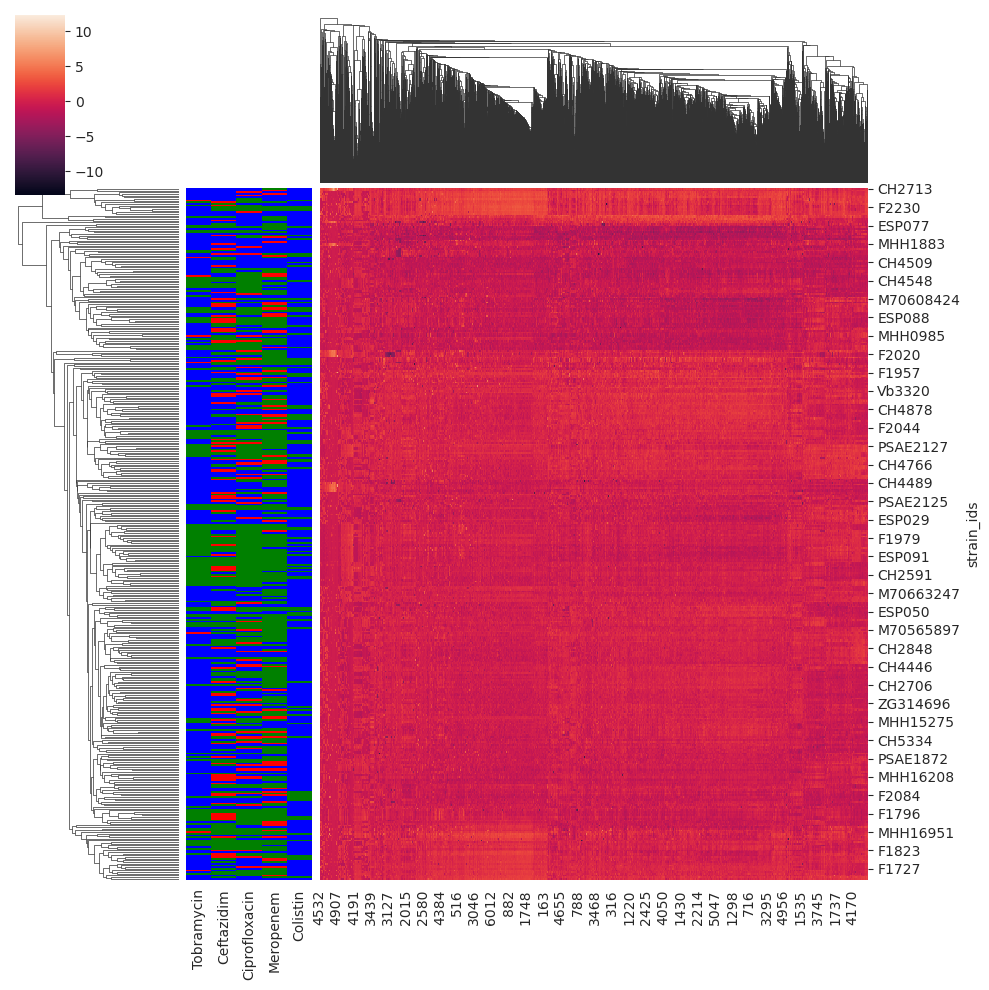

In [6]:
X = pd.DataFrame(X_genexp, index=pheno["strain_ids"])
lut = dict(zip(Y.iloc[:, 1].unique(), "gbr"))
row_colors = Y.applymap(lambda x: lut[x])
sns.clustermap(X, row_colors=row_colors)